In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**The Goal of this project is to better understand the 2022 NBA Finals Matchup**

In [2]:
nba = pd.read_csv('/Users/palvins/Downloads/nbaConverted.csv', encoding= 'unicode_escape', sep = ',')

In [3]:
# remove asterisks from team names
def remove_asterisks(nba):
    nba["Team"] = nba["Team"].str.replace("*","", regex=False)
    return nba

nba.head()

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,FT/FGA,Unnamed: 22,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Unnamed: 27,Arena,Attend.,Attend./G
0,1.0,Boston Celtics*,26.1,51.0,31.0,59,23,7.28,-0.26,7.02,...,0.195,NaN,0.502,12.5,77.3,0.183,NaN,TD Garden,727928,17754
1,2.0,Phoenix Suns*,27.5,64.0,18.0,59,23,7.50,-0.56,6.94,...,0.176,NaN,0.510,13.0,77.1,0.195,NaN,Phoenix Suns Arena,663171,16175
2,3.0,Utah Jazz*,29.3,49.0,33.0,56,26,6.04,-0.37,5.67,...,0.208,NaN,0.521,10.9,78.3,0.164,NaN,Vivint Smart Home Arena,750546,18306
3,4.0,Memphis Grizzlies*,24.0,56.0,26.0,55,27,5.68,-0.32,5.37,...,0.180,NaN,0.523,13.3,77.8,0.195,NaN,FedEx Forum,646785,15775
4,5.0,Golden State Warriors*,27.6,53.0,29.0,55,27,5.54,-0.02,5.52,...,0.181,NaN,0.509,13.0,78.7,0.201,NaN,Chase Center,740624,18064


In [4]:
def drop_teams(nba):
    # teams.sort_values("Team", inplace = True)
    teams_to_keep = [name for name in nba['Team'] if name in ['Golden State Warriors', 'Boston Celtics']]
    print('Teams in Finals: ', teams_to_keep)

    # Brute Force Method implemented as general case logic not working
    # nba.index selects index of rows which passes condition
    # nba.drop(nba[(nba['Team'] not in teams_to_keep)].index, inplace=True)

    # Brute Force Method
    nba.drop(nba.index[1:4], inplace = True)
    nba.drop(nba.index[2:29], inplace = True)
    return nba
nba

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,FT/FGA,Unnamed: 22,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Unnamed: 27,Arena,Attend.,Attend./G
0,1.0,Boston Celtics*,26.1,51.0,31.0,59,23,7.28,-0.26,7.02,...,0.195,NaN,0.502,12.5,77.3,0.183,NaN,TD Garden,727928,17754
1,2.0,Phoenix Suns*,27.5,64.0,18.0,59,23,7.50,-0.56,6.94,...,0.176,NaN,0.510,13.0,77.1,0.195,NaN,Phoenix Suns Arena,663171,16175
2,3.0,Utah Jazz*,29.3,49.0,33.0,56,26,6.04,-0.37,5.67,...,0.208,NaN,0.521,10.9,78.3,0.164,NaN,Vivint Smart Home Arena,750546,18306
3,4.0,Memphis Grizzlies*,24.0,56.0,26.0,55,27,5.68,-0.32,5.37,...,0.180,NaN,0.523,13.3,77.8,0.195,NaN,FedEx Forum,646785,15775
4,5.0,Golden State Warriors*,27.6,53.0,29.0,55,27,5.54,-0.02,5.52,...,0.181,NaN,0.509,13.0,78.7,0.201,NaN,Chase Center,740624,18064
5,6.0,Miami Heat*,28.2,53.0,29.0,53,29,4.45,-0.22,4.23,...,0.204,NaN,0.524,13.8,78.0,0.209,NaN,FTX Arena,804761,19628
6,7.0,Dallas Mavericks*,26.7,52.0,30.0,50,32,3.30,-0.18,3.12,...,0.192,NaN,0.521,12.2,78.0,0.185,NaN,American Airlines Center,808037,19708
7,8.0,Milwaukee Bucks*,28.5,51.0,31.0,49,33,3.35,-0.14,3.22,...,0.199,NaN,0.536,11.6,78.6,0.165,NaN,Fiserv Forum,715581,17453
8,9.0,Philadelphia 76ers*,26.8,51.0,31.0,48,34,2.61,-0.04,2.57,...,0.232,NaN,0.524,12.1,76.8,0.192,NaN,Wells Fargo Center,846867,20655
9,10.0,Minnesota Timberwolves*,24.2,46.0,36.0,48,34,2.63,-0.10,2.53,...,0.198,NaN,0.535,14.2,74.9,0.227,NaN,Target Center,657148,16028


**Advanced Stats for The Finals Teams**

In [5]:
# Column Cleaning
def column_cleaning(nba):
    nba.drop(columns=['Unnamed: 17', 'Unnamed: 22', 'Unnamed: 27', 'Arena', 'Attend.', 'Attend./G'], inplace = True)
    pd.set_option('display.max_columns', None)
    return nba
nba

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,FT/FGA,Unnamed: 22,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Unnamed: 27,Arena,Attend.,Attend./G
0,1.0,Boston Celtics*,26.1,51.0,31.0,59,23,7.28,-0.26,7.02,...,0.195,NaN,0.502,12.5,77.3,0.183,NaN,TD Garden,727928,17754
1,2.0,Phoenix Suns*,27.5,64.0,18.0,59,23,7.50,-0.56,6.94,...,0.176,NaN,0.510,13.0,77.1,0.195,NaN,Phoenix Suns Arena,663171,16175
2,3.0,Utah Jazz*,29.3,49.0,33.0,56,26,6.04,-0.37,5.67,...,0.208,NaN,0.521,10.9,78.3,0.164,NaN,Vivint Smart Home Arena,750546,18306
3,4.0,Memphis Grizzlies*,24.0,56.0,26.0,55,27,5.68,-0.32,5.37,...,0.180,NaN,0.523,13.3,77.8,0.195,NaN,FedEx Forum,646785,15775
4,5.0,Golden State Warriors*,27.6,53.0,29.0,55,27,5.54,-0.02,5.52,...,0.181,NaN,0.509,13.0,78.7,0.201,NaN,Chase Center,740624,18064
5,6.0,Miami Heat*,28.2,53.0,29.0,53,29,4.45,-0.22,4.23,...,0.204,NaN,0.524,13.8,78.0,0.209,NaN,FTX Arena,804761,19628
6,7.0,Dallas Mavericks*,26.7,52.0,30.0,50,32,3.30,-0.18,3.12,...,0.192,NaN,0.521,12.2,78.0,0.185,NaN,American Airlines Center,808037,19708
7,8.0,Milwaukee Bucks*,28.5,51.0,31.0,49,33,3.35,-0.14,3.22,...,0.199,NaN,0.536,11.6,78.6,0.165,NaN,Fiserv Forum,715581,17453
8,9.0,Philadelphia 76ers*,26.8,51.0,31.0,48,34,2.61,-0.04,2.57,...,0.232,NaN,0.524,12.1,76.8,0.192,NaN,Wells Fargo Center,846867,20655
9,10.0,Minnesota Timberwolves*,24.2,46.0,36.0,48,34,2.63,-0.10,2.53,...,0.198,NaN,0.535,14.2,74.9,0.227,NaN,Target Center,657148,16028


<AxesSubplot:>

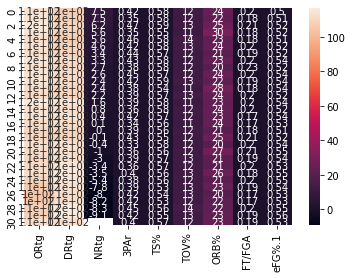

In [6]:
# Quick heatmap visualization for comparison
correlation = (nba[['ORtg', 'DRtg', 'NRtg', '3PAr', 'TS%', 'TOV%', 'ORB%', 'FT/FGA', 'eFG%.1']])
sns.heatmap(correlation, annot=True)

As we can see, both teams appear to have relatively similar advanced statistics, with the only clear difference in their ratings. 

In [7]:
Warriors = pd.read_csv('/Users/palvins/Downloads/Warriors.csv')
Celtics = pd.read_csv('/Users/palvins/Downloads/Celtics.csv')
Warriors.head()
Celtics.head()

,Rk,G,Date,Unnamed: 3,Opp,W/L,Tm,Opp.1,FG,FGA,...,FT.1,FTA.1,FT%.1,ORB.1,TRB.1,AST.1,STL.1,BLK.1,TOV.1,PF.1
0,1,1,2022-04-17,NaN,BRK,W,115,114,42,89,...,19,24,0.792,5,29,20,12,6,16,26
1,2,2,2022-04-20,NaN,BRK,W,114,107,39,75,...,27,34,0.794,9,36,16,8,8,14,28
2,3,3,2022-04-23,@,BRK,W,109,103,42,84,...,13,16,0.813,12,33,25,7,5,18,22
3,4,4,2022-04-25,@,BRK,W,116,112,42,89,...,17,29,0.586,8,38,28,5,7,10,23
4,5,5,2022-05-01,NaN,MIL,L,89,101,28,84,...,15,21,0.714,10,54,22,11,5,13,21


In [8]:
Celtics.drop(columns=['Date', 'Unnamed: 3', 'Opp', 'Rk', 'G', 'Unnamed: 24'], inplace = True)
Warriors.drop(columns=['Date', 'Unnamed: 3', 'Opp', 'Rk', 'G', 'Unnamed: 24'], inplace = True)
Warriors.head()

,W/L,Tm,Opp.1,FG,FGA,FG%,3P,3PA,3P%,FT,...,FT.1,FTA.1,FT%.1,ORB.1,TRB.1,AST.1,STL.1,BLK.1,TOV.1,PF.1
0,W,123,107,43,82,0.524,16,35,0.457,21,...,10,13,0.769,9,35,26,8,3,10,22
1,W,126,106,46,84,0.548,17,40,0.425,17,...,19,21,0.905,17,47,20,4,4,16,25
2,W,118,113,41,74,0.554,18,40,0.450,18,...,22,27,0.815,11,44,25,9,3,17,26
3,L,121,126,43,86,0.500,12,34,0.353,23,...,29,36,0.806,5,33,28,9,2,20,31
4,W,102,98,37,82,0.451,13,31,0.419,15,...,20,29,0.690,14,50,26,5,5,14,21


In [9]:
Celtics.shape
Celtics.head()

,W/L,Tm,Opp.1,FG,FGA,FG%,3P,3PA,3P%,FT,...,FT.1,FTA.1,FT%.1,ORB.1,TRB.1,AST.1,STL.1,BLK.1,TOV.1,PF.1
0,W,115,114,42,89,0.472,12,33,0.364,19,...,19,24,0.792,5,29,20,12,6,16,26
1,W,114,107,39,75,0.520,11,31,0.355,25,...,27,34,0.794,9,36,16,8,8,14,28
2,W,109,103,42,84,0.500,12,39,0.308,13,...,13,16,0.813,12,33,25,7,5,18,22
3,W,116,112,42,89,0.472,14,35,0.400,18,...,17,29,0.586,8,38,28,5,7,10,23
4,L,89,101,28,84,0.333,18,50,0.360,15,...,15,21,0.714,10,54,22,11,5,13,21


**Warriors/Celtics Win% vs Shooting Performance**

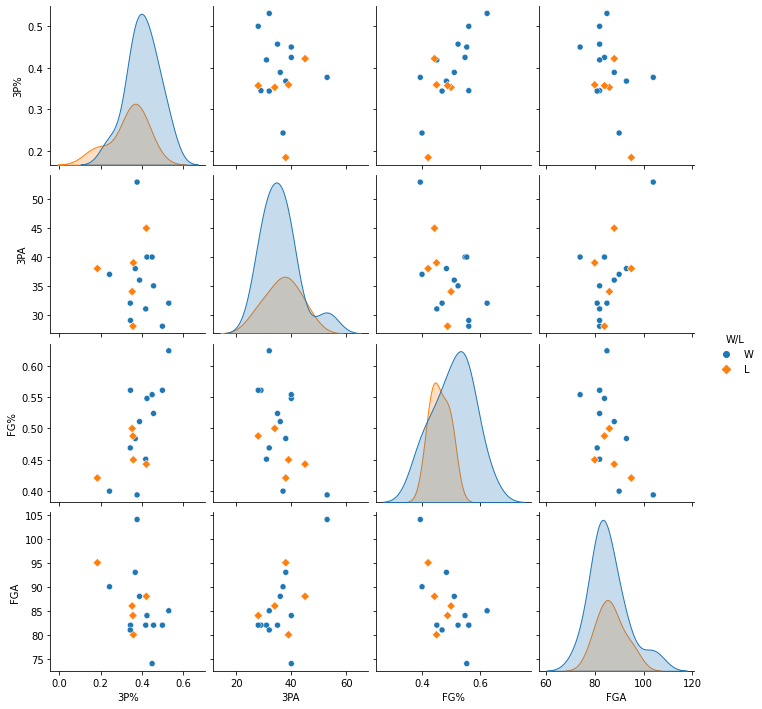

In [10]:
sns.pairplot(Warriors[['W/L', '3P%', '3PA', 'FG%', 'FGA'
]], hue = 'W/L', markers= ["o", "D"]) 

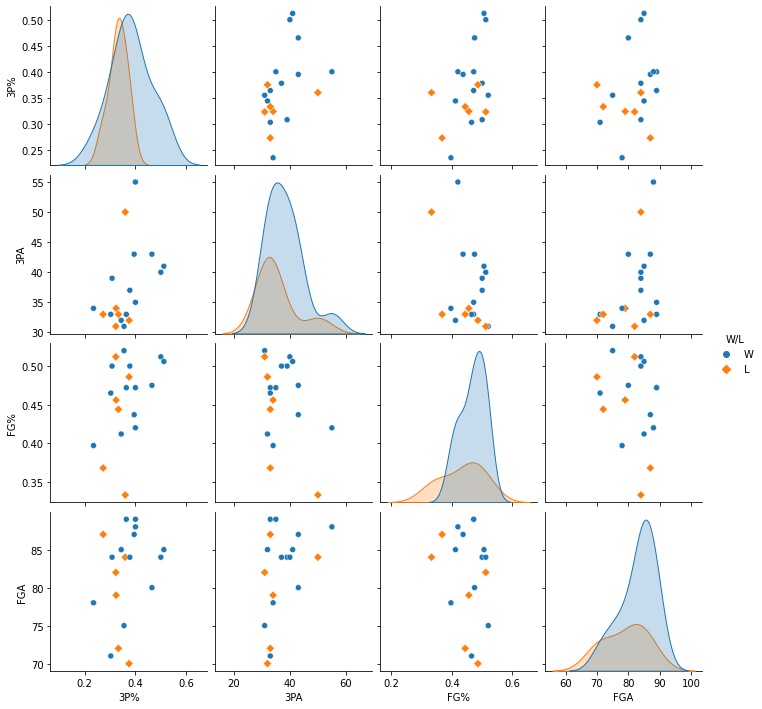

In [11]:
sns.pairplot(Celtics[['W/L', '3P%', '3PA', 'FG%', 'FGA'
]], hue = 'W/L', markers= ["o", "D"]) 

We want to cluster this data based on Wins and Losses in order to address the following question

Question 1: Does either team win more when they shoot better from 3? How about Free throws or True shooting percentage? (TS% takes into account the worth of each shot; 3 pointers are weighted heavier compared to free throws, thus >100% TS% is possible)

In [12]:
from sklearn.metrics import confusion_matrix, classification_report,  accuracy_score
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Create Classifiers



In [13]:
# convert string to int using map

Warriors['W/L'] = Warriors['W/L'].map({'W': 1, 'L': 0})
Celtics['W/L'] = Celtics['W/L'].map({'W': 1, 'L': 0})
Warriors.head()

,W/L,Tm,Opp.1,FG,FGA,FG%,3P,3PA,3P%,FT,...,FT.1,FTA.1,FT%.1,ORB.1,TRB.1,AST.1,STL.1,BLK.1,TOV.1,PF.1
0,1,123,107,43,82,0.524,16,35,0.457,21,...,10,13,0.769,9,35,26,8,3,10,22
1,1,126,106,46,84,0.548,17,40,0.425,17,...,19,21,0.905,17,47,20,4,4,16,25
2,1,118,113,41,74,0.554,18,40,0.450,18,...,22,27,0.815,11,44,25,9,3,17,26
3,0,121,126,43,86,0.500,12,34,0.353,23,...,29,36,0.806,5,33,28,9,2,20,31
4,1,102,98,37,82,0.451,13,31,0.419,15,...,20,29,0.690,14,50,26,5,5,14,21


In [14]:
# Warriors training Data

warriors_train, warriors_test = train_test_split(Warriors, test_size = .2)
warriors_train_features = warriors_train.iloc[:,3:9]
warriors_train_targ = warriors_train[['W/L']]
warriors_train_features.head(7)

,FG,FGA,FG%,3P,3PA,3P%
15,45,88,0.511,14,36,0.389
16,39,88,0.443,19,45,0.422
0,43,82,0.524,16,35,0.457
13,38,81,0.469,11,32,0.344
7,53,85,0.624,17,32,0.531
10,41,104,0.394,20,53,0.377
2,41,74,0.554,18,40,0.450


In [15]:
warriors_train_targ

,W/L
15,1
16,0
0,1
13,1
7,1
10,1
2,1
1,1
14,0
5,1


In [16]:
# Celtics training Data

celtics_train, celtics_test = train_test_split(Celtics, test_size = .2)
celtics_train_features = celtics_train.iloc[:,3:9]
celtics_train_targ = celtics_train[['W/L']]
celtics_train_features.head(7)

,FG,FGA,FG%,3P,3PA,3P%
13,34,70,0.486,12,32,0.375
15,33,71,0.465,10,33,0.303
18,43,85,0.506,21,41,0.512
12,43,84,0.512,20,40,0.500
17,35,85,0.412,11,32,0.344
0,42,89,0.472,12,33,0.364
14,31,78,0.397,8,34,0.235
